# Elektriske felter

<div class="alert alert-block alert-danger">

### Info til lærer:

Dette opplegget er tenkt som et utforskningsprogram for elever og at lærer kan vise hvordan ulike ladninger danner ulike elektriske felter. Opplegget kan brukes som: 
- en demonstrasjon
- en utforsking for elevene
- et programmeringsopplegg gitt at elevene kan noe programmering 

Tilslutt er et par eksamensoppgaver som kan løses/utforskes med dette programet.

Mål for opplæringen er at eleven skal kunne:

<div class="alert alert-block alert-info">
    
- bruke numeriske metoder og programmering til å utforske og modellere fysiske fenomener
    
- utforske, beskrive og modellere bevegelse i to dimensjoner
    
- gjøre rede for hvordan krefter kan forårsake krumlinjet bevegelse, og bruke dette i beregninger
    
- beskrive elektriske og magnetiske felt og gjøre rede for krefter på objekter med masse og ladning i slike felt

Vi skal se på hvordan det elektriske feltet endrer seg når vi har flere partikler. Vi starter med å gå gjennom formlene vi trenger for å visualisere feltet. Et elektrisk felt oppstår fra en ladning, eller mellom ladninger, og følger formelen:

$$E = \frac{F}{q}$$

I tillegg trenger vi kraften som virker mellom to elektriske ladninger, Coulombs lov:

$$F = k\frac{q_1\cdot q_2}{r^2}$$

Vi skal nå sette disse sammen og bruke dem til å visualisere elektriske felter fra én partikkel, to partikler, og til slutt flere partikler. 

## Lage formlene vi trenger

Vi har et plan med en negativ ladning $n$ og en positiv ladning $p$. Ladningen til disse to partiklene vil påvirke det elektriske feltet $E$. Vi lager et punkt $S$ et tilfeldig sted unna $n$ og $p$, og tegner opp det elektriske feltet som $n$ og $p$ lager i $S$, se figur under. Partikkelen $n$ vil bidra med en elektrisk feltstyrke gitt ved $E_n$, og tilsvarende vil partikkelen $p$ bidra med $E_p$. Summen av disse to vektorene gir feltstyrkes som oppleves i punktet $S$. 

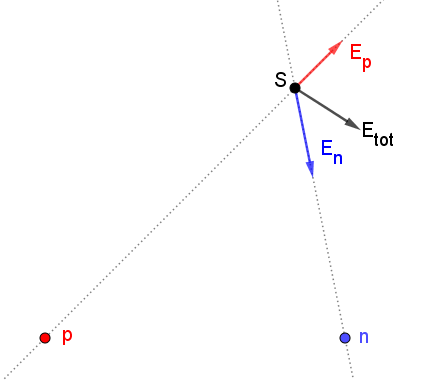

Vi ønsker nå å lage det vi kaller et vektorfelt, som viser hvor stor den elektriske feltstyrken er i hele området rundt partikkel $n$ og $p$. Vi må da starte med å regne ut størrelsen til $E_{tot}$ i en tilfeldig koordinat $S = (x, y)$.

La oss starte med å la koordinatene til $p$ være $(-1, 0)$, og koordinatene til $n$ være $(1, 0)$. Hvor stort er det elektriske feltet ved $S$? Vi legger sammen det elektriske feltet de to partiklene danner.

$$E_{tot} = E_n + E_p$$

Utregningen av det elektriske feltet $p$ og $n$ lager er identisk, men vi må passe på fortegnet. Mer om det litt lengre ned.

$$E_p = \frac{F}{q_p} $$

Siden elektrisk feltstyrke er det feltet en positiv ladning opplever, så lar vi $S$ ha en positiv ladning lik $q_S=q_p$. Det elektriske feltet punktet $S$ opplever fra den positive partikkelen $p$ blir dermed:

$$ E_p = k\cdot \frac{q_p \cdot q_p}{q_p r^2} = k\cdot \frac{q_p}{r^2}$$

For å finne $r$ må vi vite avstanden mellom partikkelen $p$ og punktet $S$. Bruker Pytagoras' setning.

$$ r = \sqrt{(x_S - x_p)^2 + (y_S - y_p)^2} $$

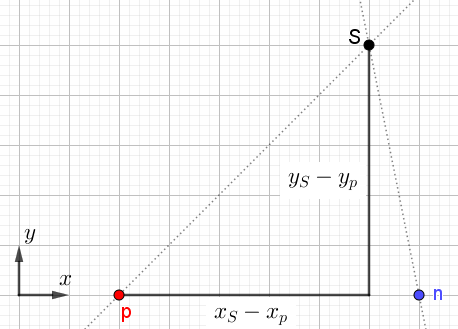

Det siste vi trenger å vite er retningen på feltstyrken i punktet $S$. Når vi gjør dette for hånd kan vi se på ladningen til partikkelen ($p$ eller $n$) og så bestemme retningen på $E$ som $S$ opplever. Utfordringen er at når vi programmerer må vi gjøre dette automatisk. Dette er litt vrient, for hvis vi bruker formelen for $r$ som vi har vist over vil vi alltid få et positivt svar. Hvis vi bruker ladningen som utgangspunkt vil vi alltid få samme retning på feltet uavhengig hvor vi er i planet. Første figur viser hvis vi retningen på feltet i $x$-retning hvis vi er tilhøyre for den positive partikkelen. 

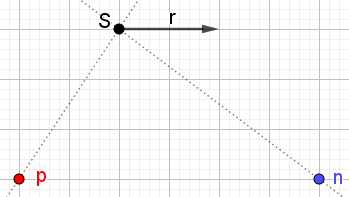

Andre figur viser hvis vi retningen på feltet i $x$-retning hvis vi er til høyre for den positive partikkelen. 

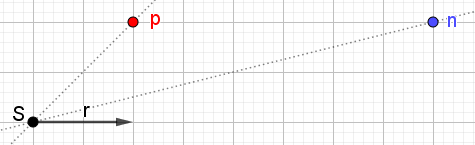

Ser at begge feltene har samme retning. Vi kan ordne dette ved å regne ut enhetsvektoren ($\vec{e_r}$). Denne har lengde 1 og retningen til feltet. Siden den har lengde 1 vil den ikke bidra til feltstyrken, og kun bidra til å gi retningen.

$$\vec{e_r} = \frac{\vec{r}}{r} $$

Siden vi har $r$ både over og under brøkstreken vil svaret alltid bli enten $1$ eller $-1$ og dermed gi retningen. Det totalt uttrykket som en positiv partikkel vil opplever fra en annen partikkel med blir da:

$$E = k\frac{q\cdot \vec{r}}{r^3}$$

### Viser gjennom to eksempler

##### Eksempel 1

Hvis vi starter med å bruke koordinatsystemet i eksemplet over får vi følgende uttrykk hvis vi kun ser på $x$-retningen:

$$ E_{px} = k \frac{q_p \cdot (x_S - x_p)}{r^3} $$

Vi ser her at $(x_S - x_p)$ er positivt og ladningen $q_p=1$, og kan dermed forkorte til

$$E_{px} = k\frac{1}{r^2}$$

Dette stemmer siden den elektriske feltstyrken skal peke vekk fra partikkel $p$ som her er i positiv $x$-retning. 

##### Eksempel 2

Vi lar nå $S$ ligge til venstre for $p$, se figur.

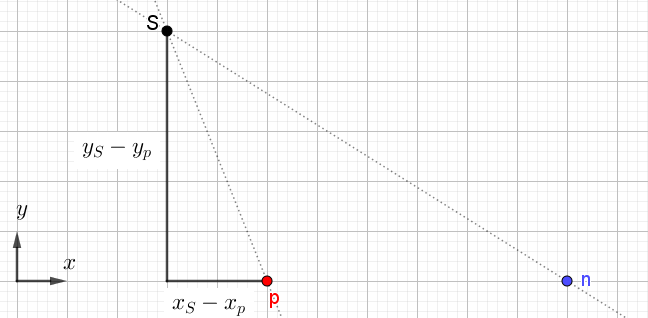


$$ E_{px} = k\frac{q_p\cdot (x_S - x_p)}{r^3} $$

Vi ser her at $(x_S - x_p)$ er negativt og ladningen $q_p=1$, og kan dermed forkorte til

$$E_{px} = k\frac{-1}{r^2}$$

Dette stemmer for nå må det elektriske feltet gå vekk fra partikkel $p$, som er negativ $x$-retning. Samme utregning vil gjelde for $y$-retningen. Vi har dermed gjennom å legge til uttrykket $\frac{\vec{r}}{r}$, sørget for at vi ikke får et problem uansett hvor punktet $S$ ligger.

## Programkode - monopol

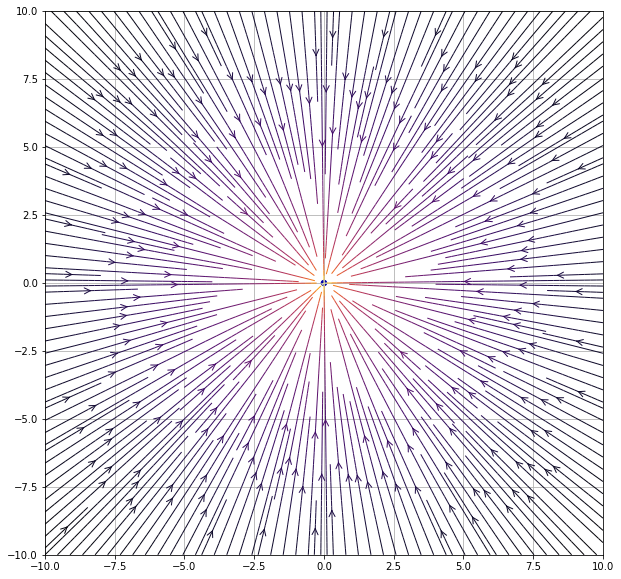

In [25]:
import numpy as np                              # Bibliotek for blant annet listefunksjonalitet og rutenett
import matplotlib.pyplot as plt                 # Bibliotek for plotting
from matplotlib.patches import Circle           # Bibliotek for å lage en liten sirkel o.O

'''Funksjon for det elektriske feltet i et punkt (x, y)'''
def E(q, x_pos, y_pos, x, y):
    r = ((x-x_pos)**2 + (y-y_pos)**2)**0.5      # Lengden på vektoren, bruker pytagoras
    E_x = q * (x - x_pos) / r**3                # Det elektriske feltet i x-retning
    E_y = q * (y - y_pos) / r**3                # Det elektriske feltet i y-retning
    return E_x, E_y                             # Returnerer det elektriske feltet i x- og y-retning

''' Lager et rutenett med et gitt antall punkter'''
nx, ny = 100, 100                               # Antall punkter i x- og y-retning
x = np.linspace(-10, 10, nx)                    # Intervall i x-retning
y = np.linspace(-10, 10, ny)                    # Intervall i y-retning
X, Y = np.meshgrid(x, y)                        # Lager rutenettet


'''Setter antallet partikler og lager tomme lister for ladning, og posisjonene i x- og y-retning'''

q = -1        # Ladningen (1 for positiv, -1 for negativ)
x_pos = 0    # x-koordinaten
y_pos = 0    # y-koordinaten 

'''Lager en liste for det elektriske feltet i alle punktene'''
Ex = np.zeros((ny, nx))
Ey = np.zeros((ny, nx))

'''Den elektriske feltstyrken som alle punkter i planet opplever'''
Ex, Ey = E(q, x_pos, y_pos, X, Y)                      # Kaller på funksjonen på linje 6

'''Setter opp figurstørrelsen'''
fig = plt.figure(figsize = (10, 10))                       # Størrelsen på plottet
ax = fig.add_subplot(111)                                  # Mulighet for å legge plott over hverandre

'''Plotter det elektriske feltet med farger og piler'''
farge = np.log((Ex**2 + Ey**2))                                              # Setter fargen avhengig av feltet
ax.streamplot(x, y, Ex, Ey, color=farge, linewidth=1, cmap=plt.cm.inferno,   # Setter parametere for plottet ...
              density=3, arrowstyle='->', arrowsize=1.5)                     # ... og tegner plottet

'''Fargelegger ladningene røde/blå'''
charge_colors = {True: '#aa0000', False: '#0000aa'}                    # Fargekoden er i hexkode
ax.add_artist(Circle((x_pos, y_pos), 0.1, color=charge_colors[q>0]))   # Fargelegger ladningene

'''Tegner rutenett'''
plt.grid()                       # Lager rutenett
plt.show()                       # Viser grafen

# Programkode - dipol

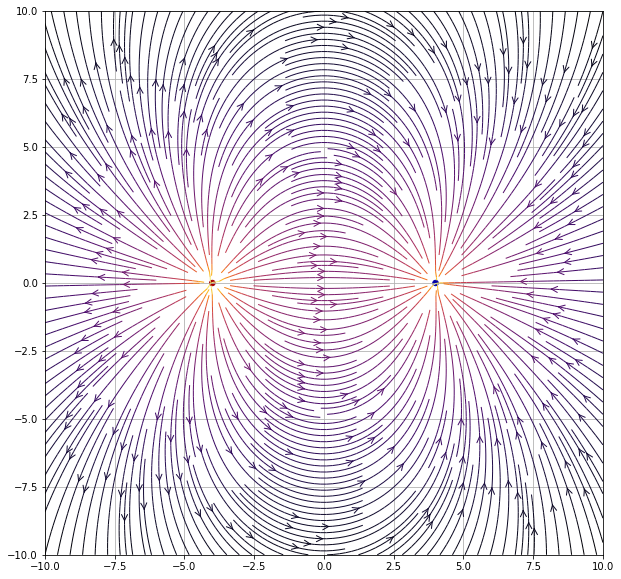

In [30]:
import numpy as np                              # Bibliotek for blant annet listefunksjonalitet og rutenett
import matplotlib.pyplot as plt                 # Bibliotek for plotting
from matplotlib.patches import Circle           # Bibliotek for å lage en liten sirkel o.O

'''Funksjon for det elektriske feltet i et punkt (x, y)'''
def E(q, x_pos, y_pos, x, y):
    r = ((x-x_pos)**2 + (y-y_pos)**2)**0.5      # Lengden på vektoren, bruker pytagoras
    E_x = q * (x - x_pos) / r**3                # Det elektriske feltet i x-retning
    E_y = q * (y - y_pos) / r**3                # Det elektriske feltet i y-retning
    return E_x, E_y                             # Returnerer det elektriske feltet i x- og y-retning

''' Lager et rutenett med et gitt antall punkter'''
nx, ny = 100, 100                               # Antall punkter i x- og y-retning
x = np.linspace(-10, 10, nx)                    # Intervall i x-retning
y = np.linspace(-10, 10, ny)                    # Intervall i y-retning
X, Y = np.meshgrid(x, y)                        # Lager rutenettet


'''Setter antallet partikler og lager tomme lister for ladning, og posisjonene i x- og y-retning'''

q = [1, -1]        # Ladningene (1 for positiv, -1 for negativ)
x_pos = [-4, 4]    # x-koordinatene
y_pos = [0, 0]    # y-koordinatene 

'''Lager en liste for det elektriske feltet i alle punktene'''
Ex = np.zeros((ny, nx))
Ey = np.zeros((ny, nx))

'''Den elektriske feltstyrken som alle punkter i planet opplever'''
Ex1, Ey1 = E(q[0], x_pos[0], y_pos[0], X, Y)  # Kaller på funksjonen på linje 6
Ex2, Ey2 = E(q[1], x_pos[1], y_pos[1], X, Y)  # Kaller på funksjonen på linje 6
Ex = Ex1 + Ex2
Ey = Ey1 + Ey2

'''Setter opp figurstørrelsen'''
fig = plt.figure(figsize = (10, 10))                       # Størrelsen på plottet
ax = fig.add_subplot(111)                                  # Mulighet for å legge plott over hverandre

'''Plotter det elektriske feltet med farger og piler'''
farge = np.log((Ex**2 + Ey**2))                                              # Setter fargen avhengig av feltet
ax.streamplot(x, y, Ex, Ey, color=farge, linewidth=1, cmap=plt.cm.inferno,   # Setter parametere for plottet ...
              density=3, arrowstyle='->', arrowsize=1.5)                     # ... og tegner plottet

'''Fargelegger ladningene røde/blå'''
charge_colors = {True: '#aa0000', False: '#0000aa'}                    # Fargekoden er i hexkode
ax.add_artist(Circle((x_pos[0], y_pos[0]), 0.1, color=charge_colors[q[0]>0]))   # Fargelegger ladningene
ax.add_artist(Circle((x_pos[1], y_pos[1]), 0.1, color=charge_colors[q[1]>0]))   # Fargelegger ladningene

'''Tegner rutenett'''
plt.grid()                       # Lager rutenett
plt.show()                       # Viser grafen

# Programkode - flere ladninger

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

'''Funksjon for det elektriske feltet i et punkt (x, y)'''
def E(q, x_pos, y_pos, x, y):
    r = ((x-x_pos)**2 + (y-y_pos)**2)**0.5      # Lengden på vektoren, bruker pytagoras
    E_x = q * (x - x_pos) / r**3                # Det elektriske feltet i x-retning
    E_y = q * (y - y_pos) / r**3                # Det elektriske feltet i y-retning
    return E_x, E_y                             # Returnerer det elektriske feltet i x- og y-retning

''' Lager et rutenett med et gitt antall punkter'''
nx, ny = 100, 100                               # Antall punkter i x- og y-retning
x = np.linspace(-10, 10, nx)                    # Intervall i x-retning
y = np.linspace(-10, 10, ny)                    # Intervall i y-retning
X, Y = np.meshgrid(x, y)                        # Lager rutenettet


'''Setter antallet partikler og lager tomme lister for ladning, og posisjonene i x- og y-retning'''
nq = int(input("Antall partikler: "))           # Ber brukeren om antallet ladninger (evt bare skrive inn)
q = []        # Liste for ladningene            # Tom liste for alle ladningene
x_pos = []    # Liste for x-posisjonen          # Tom liste for x-koordinatene til punktene
y_pos = []    # Liste for y-posisjonen          # Tom liste for y-koordinatene til punktene

'''Løkke som henter inn informasjon om ladning og posisjon til partiklene'''
for i in range(nq):
    print("Hva er ladningen på partikkel", i)                  # Spør hva ladningen er
    q.append(int(input())                                      # Skriver inn hva ladningen er (+1/-1)
    x_pos.append(int(input("Hva er x-koordinaten (-5, 5)")))   # Hva er x-koordianten til ladningen
    y_pos.append(int(input("Hva er y-koordinaten (-5, 5)")))   # Hva er y-koordianten til ladningen

'''Lager en liste for det elektriske feltet i alle punktene'''
Ex = np.zeros((ny, nx))
Ey = np.zeros((ny, nx))

'''Løkke som summerer opp den elektriske feltstyrken som alle punkter i planet opplever'''
for i in range(nq):
    ex, ey = E(q[i], x_pos[i], y_pos[i], X, Y)             # Kaller på funksjonen på linje 6 for hver partikkel
    Ex = Ex + ex                                           # Summerer opp elektriske feltet i x-retning
    Ey = Ey + ey                                           # Summerer opp elektriske feltet i y-retning 

'''Setter opp figurstørrelsen'''
fig = plt.figure(figsize = (10, 10))                       # Størrelsen på plottet
ax = fig.add_subplot(111)                                  # Mulighet for å legge plott over hverandre

'''Plotter det elektriske feltet med farger og piler'''
farge = np.log((Ex**2 + Ey**2))                                              # Setter fargen avhengig av feltet
ax.streamplot(x, y, Ex, Ey, color=farge, linewidth=1, cmap=plt.cm.inferno,   # Setter parametere for plottet ...
              density=3, arrowstyle='->', arrowsize=1.5)                     # ... og tegner plottet

'''Fargelegger ladningene røde/blå'''
charge_colors = {True: '#aa0000', False: '#0000aa'}                                 # Fargekoden er i hexkode
for i in range(nq):
    ax.add_artist(Circle((x_pos[i], y_pos[i]), 0.1, color=charge_colors[q[i]>0]))   # Fargelegger ladningene

'''Tegner rutenett'''
plt.grid()                       # Lager rutenett
plt.show()                       # Viser grafen

# Programkode - Flere partikler tilfeldig plassert

Antall partikler: 3


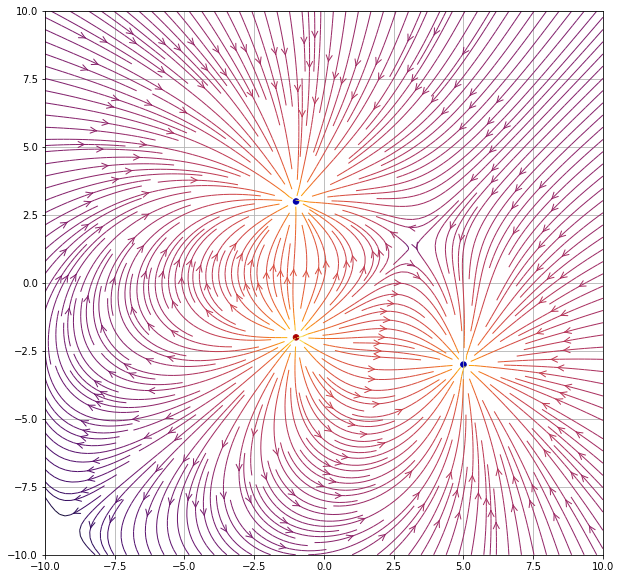

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from matplotlib.patches import Circle

'''Funksjon for det elektriske feltet i et punkt (x, y)'''
def E(q, x_pos, y_pos, x, y):
    r = ((x-x_pos)**2 + (y-y_pos)**2)**0.5      # Lengden på vektoren, bruker pytagoras
    E_x = q * (x - x_pos) / r**3                # Det elektriske feltet i x-retning
    E_y = q * (y - y_pos) / r**3                # Det elektriske feltet i y-retning
    return E_x, E_y                             # Returnerer det elektriske feltet i x- og y-retning

''' Lager et rutenett med et gitt antall punkter'''
nx, ny = 100, 100                               # Antall punkter i x- og y-retning
x = np.linspace(-10, 10, nx)                    # Intervall i x-retning
y = np.linspace(-10, 10, ny)                    # Intervall i y-retning
X, Y = np.meshgrid(x, y)                        # Lager rutenettet


'''Setter antallet partikler og lager tomme lister for ladning, og posisjonene i x- og y-retning'''
nq = int(input("Antall partikler: "))           # Ber brukeren om antallet ladninger (evt bare skrive inn)
q = []        # Liste for ladningene            # Tom liste for alle ladningene
x_pos = []    # Liste for x-posisjonen          # Tom liste for x-koordinatene til punktene
y_pos = []    # Liste for y-posisjonen          # Tom liste for y-koordinatene til punktene

'''Løkke som henter inn informasjon om ladning og posisjon til partiklene'''
for i in range(nq):
    q.append((-1)**randint(1, 2))                  # Genererer en tilfeldig ladning
    x_pos.append(randint(-5, 5))                # Genererer en tilfeldig x-koordinat              
    y_pos.append(randint(-5, 5))                # Genererer en tilfeldig y-koordinat

'''Lager en liste for det elektriske feltet i alle punktene'''
Ex = np.zeros((ny, nx))
Ey = np.zeros((ny, nx))

'''Løkke som summerer opp den elektriske feltstyrken som alle punkter i planet opplever'''
for i in range(nq):
    ex, ey = E(q[i], x_pos[i], y_pos[i], X, Y)             # Kaller på funksjonen på linje 6 for hver partikkel
    Ex = Ex + ex                                           # Summerer opp elektriske feltet i x-retning
    Ey = Ey + ey                                           # Summerer opp elektriske feltet i y-retning 

'''Setter opp figurstørrelsen'''
fig = plt.figure(figsize = (10, 10))                       # Størrelsen på plottet
ax = fig.add_subplot(111)                                  # Mulighet for å legge plott over hverandre

'''Plotter det elektriske feltet med farger og piler'''
farge = np.log((Ex**2 + Ey**2))                                              # Setter fargen avhengig av feltet
ax.streamplot(x, y, Ex, Ey, color=farge, linewidth=1, cmap=plt.cm.inferno,   # Setter parametere for plottet ...
              density=3, arrowstyle='->', arrowsize=1.5)                     # ... og tegner plottet

'''Fargelegger ladningene røde/blå'''
charge_colors = {True: '#aa0000', False: '#0000aa'}                                 # Fargekoden er i hexkode
for i in range(nq):
    ax.add_artist(Circle((x_pos[i], y_pos[i]), 0.1, color=charge_colors[q[i]>0]))   # Fargelegger ladningene

'''Tegner rutenett'''
plt.grid()                       # Lager rutenett
plt.show()                       # Viser grafen

## Eksempel på eksamensoppgaver dere kan bruke kodene over til å løse

#### Fra eksamen høst 2013:

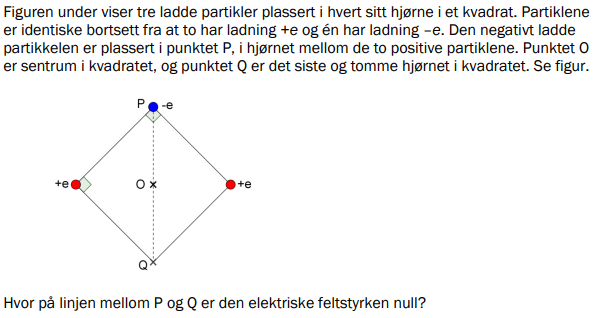

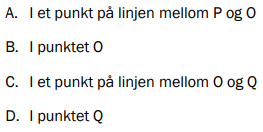

#### Fra eksamen vår 2014:

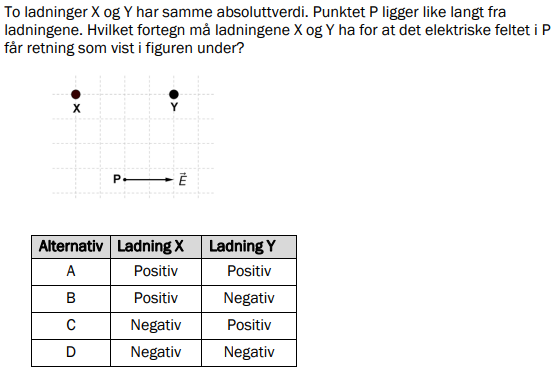

#### Fra eksamen høst 2014:

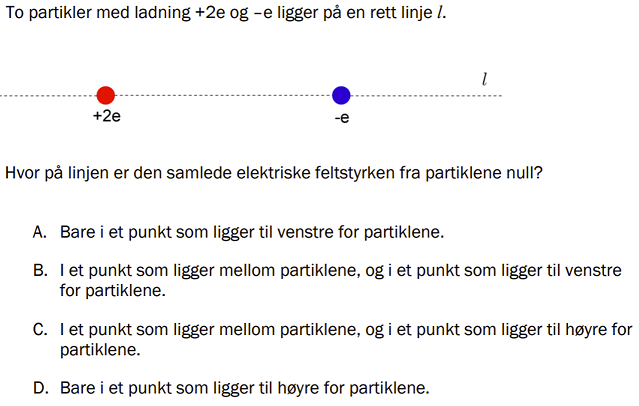

#### Fra eksamen vår 2015:

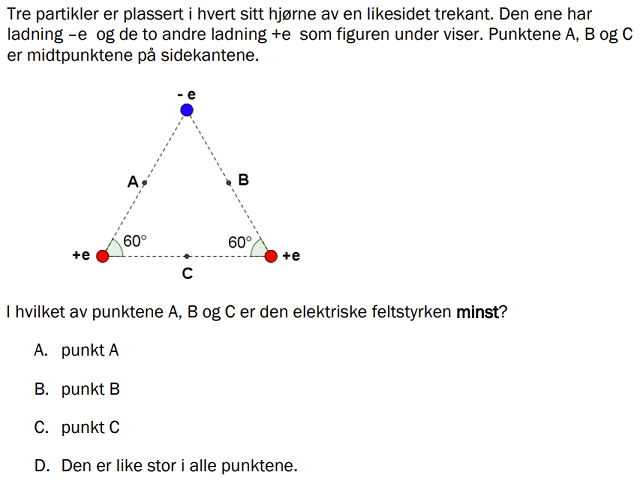

#### Fra eksamen høst 2015:

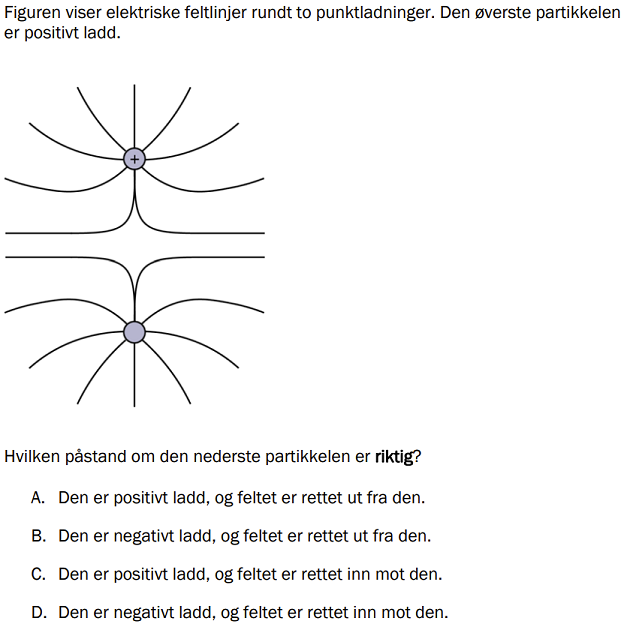